In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("/content/power_data.csv")
df = df.dropna()

In [16]:
#df['Datetimeserverdell'] = pd.to_datetime(df['Datetimeserverdell'], format='%H:%M:%S')
#df['Datetimeserverdell'] = df['Datetimeserverdell'].dt.hour * 3600 + df['Datetimeserverdell'].dt.minute * 60 + df['Datetimeserverdell'].dt.second
# Normalize time to range 0–1 (if not already)
df['Time'] = np.linspace(0, 1, len(df))


In [18]:
#x = df[['Datetimeserverdell']]
#y = df['Total Load kW']
# Features and target
X = df[['Time']].values
y = df['Total Load kW'].values

In [19]:
#poly_features = PolynomialFeatures(degree=2)
#poly_model = make_pipeline(poly_features, LinearRegression())
# Polynomial Transformation (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [21]:
#poly_model.fit(x, y)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [22]:
#poly_predictions = poly_model.predict(x)
# Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_poly)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

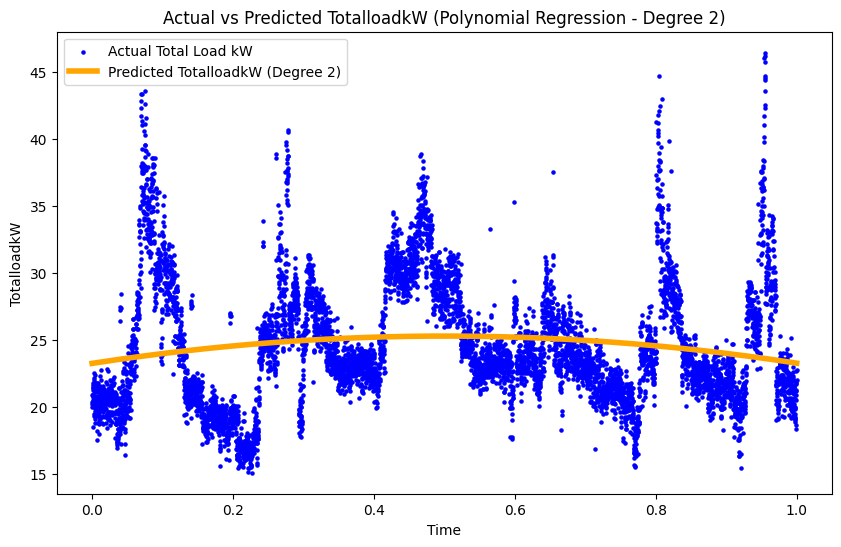

In [30]:

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=5, label='Actual Total Load kW')
plt.plot(X, y_pred, color='orange', linewidth=4, label='Predicted TotalloadkW (Degree 2)')
plt.xlabel("Time")
plt.ylabel("TotalloadkW")
plt.title("Actual vs Predicted TotalloadkW (Polynomial Regression - Degree 2)")
plt.legend()
plt.show()

In [10]:
poly_rmse = mean_squared_error(y, poly_predictions)
poly_mape = mean_absolute_percentage_error(y, poly_predictions)
poly_r2_score = poly_model.score(x, y)

In [13]:
print(f'RMSE: {3.9654235617286472}')
print(f'MAPE: {poly_mape}')
print(f'R² Score: {poly_r2_score}')

RMSE: 3.965423561728647
MAPE: 0.12738695163165625
R² Score: 0.28350198761892453


In [32]:
new_time = np.array([[43200]])  # Replace 10 with the desired time value
predicted_load = poly_model.predict(new_time)
print(f"Predicted load for entered time {new_time[0][0]}: {predicted_load[0]}")

Predicted load for entered time 43200: 26.83453667521782


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
